<a href="https://colab.research.google.com/github/venuy560/Chicago_crime_chronicles/blob/main/Chicago_Crime_Chronicles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apache PySpark

## Introduction to Google Colab

### Jupyter notebook basics

#### Code cells

#### Text cells

### Access to the shell

## Install Spark

- Google colab recently made some changes which breaks the Spark installation.
- Please use the code below where we install from the pyspark package instead

In [2]:
!pip install pyspark==3.4.0

In [3]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
spark

## (02-02) Download Chicago's Reported Crime Data

### Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
!wget https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
!ls -l

--2025-06-01 04:10:24--  https://data.cityofchicago.org/api/views/ijzp-q8t2/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv?accessType=DOWNLOAD’

rows.csv?accessType     [        <=>         ]   1.83G  3.05MB/s    in 11m 3s  

2025-06-01 04:21:27 (2.83 MB/s) - ‘rows.csv?accessType=DOWNLOAD’ saved [1967037685]

total 1920944
-rw-r--r-- 1 root root 1967037685 May 31 10:59 'rows.csv?accessType=DOWNLOAD'
drwxr-xr-x 1 root root       4096 May 29 14:01  sample_data


In [5]:
!mv rows.csv\?accessType\=DOWNLOAD reported-crimes.csv
!ls -l

total 1920944
-rw-r--r-- 1 root root 1967037685 May 31 10:59 reported-crimes.csv
drwxr-xr-x 1 root root       4096 May 29 14:01 sample_data


In [6]:
from pyspark.sql.functions import to_timestamp,col,lit
rc = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') <= lit('2018-11-11'))
rc.show(5)

+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|               Date|               Block|IUCR|       Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+-------------------+--------------------+----+-------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|11227634|   JB147599|2017-08-26 10:00:00| 001XX W RANDOLPH ST|0281|CRIM SEXUAL ASSAULT|      NON-AGGRAVATED|         HOTEL/MOTEL|

## (03-03) Schemas

In [9]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: string (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: string (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: string (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: string (nullable = true)
 |-- Longitude: string (nullable = true)
 |-- Location: string (nullable = true)



In [10]:
from pyspark.sql.types import StructType, StructField, StringType, TimestampType, BooleanType, DoubleType, IntegerType

In [11]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [12]:
labels = [('ID',StringType()),
          ('Case Number',StringType()),
          ('Date',TimestampType()),
          ('Block',StringType()),
          ('IUCR',StringType()),
          ('Primary Type',StringType()),
          ('Description',StringType()),
          ('Location Description',StringType()),
          ('Arrest',StringType()),
          ('Domestic',BooleanType()),
          ('Beat',StringType()),
          ('District',BooleanType()),
          ('Ward',StringType()),
          ('Community Area',StringType()),
          ('FBI Code',StringType()),
          ('X Coordinate',StringType()),
          ('Y Coordinate',StringType()),
          ('Year',IntegerType()),
          ('Updated On',StringType()),
          ('Latitude',DoubleType()),
          ('Longitude',DoubleType()),
          ('Location',StringType())
          ]

In [13]:
schema = StructType([StructField(x[0],x[1],True) for x in labels])
schema

StructType([StructField('ID', StringType(), True), StructField('Case Number', StringType(), True), StructField('Date', TimestampType(), True), StructField('Block', StringType(), True), StructField('IUCR', StringType(), True), StructField('Primary Type', StringType(), True), StructField('Description', StringType(), True), StructField('Location Description', StringType(), True), StructField('Arrest', StringType(), True), StructField('Domestic', BooleanType(), True), StructField('Beat', StringType(), True), StructField('District', BooleanType(), True), StructField('Ward', StringType(), True), StructField('Community Area', StringType(), True), StructField('FBI Code', StringType(), True), StructField('X Coordinate', StringType(), True), StructField('Y Coordinate', StringType(), True), StructField('Year', IntegerType(), True), StructField('Updated On', StringType(), True), StructField('Latitude', DoubleType(), True), StructField('Longitude', DoubleType(), True), StructField('Location', Strin

In [14]:
rc = spark.read.csv('reported-crimes.csv', schema=schema)
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- IUCR: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: boolean (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [15]:
rc.show(5)

+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|    null|Beat|    null|Ward|Community Area|FBI Co

## (03-04) Working with columns

**Display only the first 5 rows of the column name IUCR**

In [16]:
rc.select('IUCR').show(5)

+----+
|IUCR|
+----+
|IUCR|
|1582|
|2017|
|0281|
|1320|
+----+
only showing top 5 rows



In [17]:
rc.select(rc.IUCR).show(5)

+----+
|IUCR|
+----+
|IUCR|
|1582|
|2017|
|0281|
|1320|
+----+
only showing top 5 rows



In [18]:
rc.select(col('IUCR')).show(5)

+----+
|IUCR|
+----+
|IUCR|
|1582|
|2017|
|0281|
|1320|
+----+
only showing top 5 rows



  **Display only the first 4 rows of the column names Case Number, Date and Arrest**

In [19]:
rc.select('Case Number','Date','Arrest').show(4)

+-----------+----+------+
|Case Number|Date|Arrest|
+-----------+----+------+
|Case Number|null|Arrest|
|   JG503434|null|  true|
|   JG103252|null|  true|
|   JB147599|null| false|
+-----------+----+------+
only showing top 4 rows



**Add a column with name One, with entries all 1s**

In [20]:
from pyspark.sql.functions import lit

In [21]:
rc.withColumn('One',lit(1)).show(5)

+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|Date|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|One|
+--------+-----------+----+--------------------+----+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+---+
|      ID|Case Number|null|               Block|IUCR|        Primary Type|         Description|Location Description|Arrest|    null|Beat|    null|Ward|Community

**Remove the column IUCR**

In [22]:
rc = rc.drop('IUCR')
rc.show(5)

+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|        Primary Type|         Description|Location Description|Arrest|    null|Beat|    null|Ward|Community Area|FBI Code|X Coordinate|Y Co

## (03-05) Working with rows

**Add the reported crimes for an additional day, 12-Nov-2018, to our dataset.**

In [23]:
 one_day = spark.read.csv('reported-crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a')).filter(col('Date') == lit('2018-11-12'))
 one_day.count()

5

In [ ]:
rc.union(one_day).orderBy('Date',ascending=False).show(5)

**What are the top 10 number of reported crimes by Primary type, in descending order of occurence?**

In [24]:
rc.groupBy('Primary Type').count().orderBy('count',ascending=False).show(10)

+-------------------+-------+
|       Primary Type|  count|
+-------------------+-------+
|              THEFT|1765298|
|            BATTERY|1516732|
|    CRIMINAL DAMAGE| 946753|
|          NARCOTICS| 761020|
|            ASSAULT| 555208|
|      OTHER OFFENSE| 518815|
|           BURGLARY| 441096|
|MOTOR VEHICLE THEFT| 423629|
| DECEPTIVE PRACTICE| 381532|
|            ROBBERY| 312077|
+-------------------+-------+
only showing top 10 rows



## (03-06) Challenge

**What percentage of reported crimes resulted in an arrest?**

In [25]:
rc.select('Arrest').distinct().show()

+------+
|Arrest|
+------+
|Arrest|
| false|
|  true|
+------+



In [26]:
rc.printSchema()

root
 |-- ID: string (nullable = true)
 |-- Case Number: string (nullable = true)
 |-- Date: timestamp (nullable = true)
 |-- Block: string (nullable = true)
 |-- Primary Type: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Location Description: string (nullable = true)
 |-- Arrest: string (nullable = true)
 |-- Domestic: boolean (nullable = true)
 |-- Beat: string (nullable = true)
 |-- District: boolean (nullable = true)
 |-- Ward: string (nullable = true)
 |-- Community Area: string (nullable = true)
 |-- FBI Code: string (nullable = true)
 |-- X Coordinate: string (nullable = true)
 |-- Y Coordinate: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Updated On: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Location: string (nullable = true)



In [27]:
rc.filter(col('Arrest') == 'true').count() / rc.select('Arrest').count()

0.2534542710075234

  **What are the top 3 locations for reported crimes?**

In [28]:
rc.groupBy('Location Description').count().orderBy('count',ascending=False).show(3)

+--------------------+-------+
|Location Description|  count|
+--------------------+-------+
|              STREET|2174476|
|           RESIDENCE|1371604|
|           APARTMENT| 982473|
+--------------------+-------+
only showing top 3 rows



## (04-01) Built-in functions

In [29]:
from pyspark.sql import functions

In [30]:
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'PythonEvalType', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Union', 'UserDefinedFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_append', 'array_compact', 'array_contains', 'array_distinct', 'array_except', 'ar

### String functions

**Display the Primary Type column in lower and upper characters, and the first 4 characters of the column**

In [31]:
from pyspark.sql.functions import lower, upper, substring

In [32]:
help(substring)

Help on function substring in module pyspark.sql.functions:

substring(str: 'ColumnOrName', pos: int, len: int) -> pyspark.sql.column.Column
    Substring starts at `pos` and is of length `len` when str is String type or
    returns the slice of byte array that starts at `pos` in byte and is of length `len`
    when str is Binary type.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    The position is not zero based, but 1 based index.
    
    Parameters
    ----------
    str : :class:`~pyspark.sql.Column` or str
        target column to work on.
    pos : int
        starting position in str.
    len : int
        length of chars.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        substring of given value.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(substring(df.s, 1, 2).alias('s')).collect()
    [Row(s='ab')]



In [33]:
rc.select(lower(col('Primary Type')),upper(col('Primary Type')),substring(col('Primary Type'),1,4)).show(5)

+--------------------+--------------------+-----------------------------+
| lower(Primary Type)| upper(Primary Type)|substring(Primary Type, 1, 4)|
+--------------------+--------------------+-----------------------------+
|        primary type|        PRIMARY TYPE|                         Prim|
|offense involving...|OFFENSE INVOLVING...|                         OFFE|
|           narcotics|           NARCOTICS|                         NARC|
| crim sexual assault| CRIM SEXUAL ASSAULT|                         CRIM|
|     criminal damage|     CRIMINAL DAMAGE|                         CRIM|
+--------------------+--------------------+-----------------------------+
only showing top 5 rows



### Numeric functions


**Show the oldest date and the most recent date**

In [34]:
from pyspark.sql.functions import min, max

In [35]:
rc.select(min(col('Date')),max(col('Date'))).show(1)

+---------+---------+
|min(Date)|max(Date)|
+---------+---------+
|     null|     null|
+---------+---------+



### Date

**What is 3 days earlier that the oldest date and 3 days later than the most recent date?**

In [36]:
from pyspark.sql.functions import date_add, date_sub

In [37]:
help(date_add)

Help on function date_add in module pyspark.sql.functions:

date_add(start: 'ColumnOrName', days: Union[ForwardRef('ColumnOrName'), int]) -> pyspark.sql.column.Column
    Returns the date that is `days` days after `start`. If `days` is a negative value
    then these amount of days will be deducted from `start`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    start : :class:`~pyspark.sql.Column` or str
        date column to work on.
    days : :class:`~pyspark.sql.Column` or str or int
        how many days after the given date to calculate.
        Accepts negative value as well to calculate backwards in time.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        a date after/before given number of days.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08', 2,)], ['dt', 'add'])
    >>> df.select(date_add(df.dt, 1).alias('next_date')).collect()
    [Ro

In [38]:
rc.select(date_sub(min(col('Date')),3),date_add(max(col('Date')),3)).show(1)

+----------------------+----------------------+
|date_sub(min(Date), 3)|date_add(max(Date), 3)|
+----------------------+----------------------+
|                  null|                  null|
+----------------------+----------------------+



## (04-02) Working with dates

In [ ]:
# Assuming that 'rc' is the intended DataFrame
rc.select(to_date(lit('2019-12-25')),to_date(lit('2019-25-15'))).show(1)

+-------------------+-------------------+
|to_date(2019-12-25)|to_date(2019-25-15)|
+-------------------+-------------------+
|         2019-12-25|               null|
+-------------------+-------------------+
only showing top 1 row



In [ ]:
from pyspark.sql.functions import to_date, to_timestamp, lit

  **2019-12-25 13:30:00**

In [ ]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)],['Christmas'])
df.show(1)

+-------------------+
|          Christmas|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+



In [ ]:
df.select(to_date(col('Christmas'),'yyyy-MM-dd HH:mm:ss'),to_timestamp(col('Christmas'))).show(1)

+---------------------------------------+-----------------------+
|to_date(Christmas, yyyy-MM-dd HH:mm:ss)|to_timestamp(Christmas)|
+---------------------------------------+-----------------------+
|                             2019-12-25|    2019-12-25 13:30:00|
+---------------------------------------+-----------------------+



**25/Dec/2019 13:30:00**

In [ ]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)],['Christmas'])
df.show(1,truncate=False)


+--------------------+
|Christmas           |
+--------------------+
|25/Dec/2019 13:30:00|
+--------------------+



In [ ]:
df.select(to_date(col('Christmas'),'dd/MMM/yyyy HH:mm:ss'),to_timestamp(col('Christmas'),'dd/MMM/yyyy HH:mm:ss')).show(1)

+----------------------------------------+---------------------------------------------+
|to_date(Christmas, dd/MMM/yyyy HH:mm:ss)|to_timestamp(Christmas, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------------+---------------------------------------------+
|                              2019-12-25|                          2019-12-25 13:30:00|
+----------------------------------------+---------------------------------------------+



**12/25/2019 01:30:00 PM**

In [ ]:
df = spark.createDataFrame([('12/25/2019 01:30:00 PM',)],['Christmas'])
df.show(1,truncate=False)

+----------------------+
|Christmas             |
+----------------------+
|12/25/2019 01:30:00 PM|
+----------------------+



In [ ]:
df.select(to_date(col('Christmas'),'MM/dd/yyyy hh:mm:ss a'),to_timestamp(col('Christmas'),'MM/dd/yyyy hh:mm:ss a')).show(1)

+-----------------------------------------+----------------------------------------------+
|to_date(Christmas, MM/dd/yyyy hh:mm:ss a)|to_timestamp(Christmas, MM/dd/yyyy hh:mm:ss a)|
+-----------------------------------------+----------------------------------------------+
|                               2019-12-25|                           2019-12-25 13:30:00|
+-----------------------------------------+----------------------------------------------+



In [ ]:
nrc = spark.read.csv('reported-crimes.csv',header=True)
nrc.show(5,truncate=False)

+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+-----------------------------+
|ID      |Case Number|Date                  |Block                    |IUCR|Primary Type|Description                                            |Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|Updated On            |Latitude    |Longitude    |Location                     |
+--------+-----------+----------------------+-------------------------+----+------------+-------------------------------------------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+----------------------+------------+-------------+--------------------

## (04-03) Joins

**Download police station data**

In [61]:
!wget -O police-station.csv https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD

--2025-06-01 05:13:37--  https://data.cityofchicago.org/api/views/z8bn-74gv/rows.csv?accessType=DOWNLOAD
Resolving data.cityofchicago.org (data.cityofchicago.org)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofchicago.org (data.cityofchicago.org)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘police-station.csv’

police-station.csv      [ <=>                ]   5.57K  --.-KB/s    in 0s      

2025-06-01 05:13:37 (1.36 GB/s) - ‘police-station.csv’ saved [5699]



In [62]:
ps = spark.read.csv('police-station.csv',header=True)
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 1172080.029| 1908086.527|41.90324165|-87.64335214|(41.9032416531, -

**The reported crimes dataset has only the district number. Add the district name by joining with the police station dataset**

In [ ]:
rc.cache()
rc.count()

8174896

In [ ]:
ps.select(col('DISTRICT')).distinct().show(30)

+--------------------+
|            DISTRICT|
+--------------------+
|                   7|
|                  15|
|                  11|
|                   3|
|                   8|
|                  22|
|                  16|
|                   5|
|                  18|
|                  17|
|                   6|
|                  19|
|                  25|
|        Headquarters|
|                  24|
|                   9|
|                   1|
|                  20|
|                  10|
|                   4|
|                  12|
|                  14|
|                   2|
|",Chicago,IL,6060...|
+--------------------+



In [ ]:
rc.select('District').distinct().show(30)

+--------+
|District|
+--------+
|     009|
|     012|
|     024|
|     031|
|     015|
|     006|
|     019|
|     020|
|     011|
|     025|
|     005|
|     003|
|     016|
|     018|
|     008|
|     022|
|     001|
|     014|
|     010|
|     004|
|     017|
|     007|
|     002|
|    null|
+--------+



In [ ]:
from pyspark.sql.functions import lpad

In [ ]:
help(lpad)

Help on function lpad in module pyspark.sql.functions:

lpad(col: 'ColumnOrName', len: int, pad: str) -> pyspark.sql.column.Column
    Left-pad the string column to width `len` with `pad`.
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target column to work on.
    len : int
        length of the final string.
    pad : str
        chars to prepend.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        left padded result.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('abcd',)], ['s',])
    >>> df.select(lpad(df.s, 6, '#').alias('s')).collect()
    [Row(s='##abcd')]



In [ ]:
ps.select(lpad(col('DISTRICT'),3,'0')).show()

+--------------------+
|lpad(DISTRICT, 3, 0)|
+--------------------+
|                 Hea|
|                 018|
|                 019|
|                 020|
|                 022|
|                 024|
|                 025|
|                 001|
|                 002|
|                 003|
|                 004|
|                 005|
|                 006|
|                 007|
|                 008|
|                 009|
|                 010|
|                 011|
|                 012|
|                 ",C|
+--------------------+
only showing top 20 rows



In [ ]:
ps = ps.withColumn('Format_district',lpad(col('DISTRICT'),3,'0'))
ps.show(5)

+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|    DISTRICT|DISTRICT NAME|            ADDRESS|   CITY|STATE|  ZIP|             WEBSITE|       PHONE|         FAX|         TTY|X COORDINATE|Y COORDINATE|   LATITUDE|   LONGITUDE|            LOCATION|Format_district|
+------------+-------------+-------------------+-------+-----+-----+--------------------+------------+------------+------------+------------+------------+-----------+------------+--------------------+---------------+
|Headquarters| Headquarters|3510 S Michigan Ave|Chicago|   IL|60653|http://home.chica...|        null|        null|        null| 1177731.401| 1881697.404|41.83070169|-87.62339535|(41.8307016873, -...|            Hea|
|          18|   Near North| 1160 N Larrabee St|Chicago|   IL|60610|http://home.chica...|312-742-5870|312-742-5771|312-742-5773| 117

In [ ]:
rc.join(ps,rc.District == ps.Format_district,'left_outer').drop('ADDRESS','CITY','STATE','ZIP','WEBSITE','PHONE','FAX','TTY','X COORDINATE','Y COORDINATE','LATITUDE','LONGITUDE','LOCATION').show(5)

+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
|      ID|Case Number|               Date|             Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|Year|          Updated On|DISTRICT|DISTRICT NAME|Format_district|
+--------+-----------+-------------------+------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+----+--------------------+--------+-------------+---------------+
| 5741943|   HN549294|2007-08-25 09:22:18|074XX N ROGERS AVE|             ASSAULT|              SIMPLE|               OTHER| false|   false|2422|     024|  49|             1|     08A|2007|08/17/2015 03:03:...|      24|  Rogers Park|            024|
| 19

## (04-05) Challenge questions

**What is the most frequently reported non-criminal activity?**

In [39]:
rc.cache()
rc.count()

8324839

In [40]:
rc.show(5)

+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|        Primary Type|         Description|Location Description|Arrest|    null|Beat|    null|Ward|Community Area|FBI Code|X Coordinate|Y Co

In [41]:
rc.select('Primary Type').distinct().count()

37

In [42]:
rc.select('Primary Type').distinct().orderBy(col('Primary Type')).show(32,truncate=False)

+---------------------------------+
|Primary Type                     |
+---------------------------------+
|ARSON                            |
|ASSAULT                          |
|BATTERY                          |
|BURGLARY                         |
|CONCEALED CARRY LICENSE VIOLATION|
|CRIM SEXUAL ASSAULT              |
|CRIMINAL DAMAGE                  |
|CRIMINAL SEXUAL ASSAULT          |
|CRIMINAL TRESPASS                |
|DECEPTIVE PRACTICE               |
|DOMESTIC VIOLENCE                |
|GAMBLING                         |
|HOMICIDE                         |
|HUMAN TRAFFICKING                |
|INTERFERENCE WITH PUBLIC OFFICER |
|INTIMIDATION                     |
|KIDNAPPING                       |
|LIQUOR LAW VIOLATION             |
|MOTOR VEHICLE THEFT              |
|NARCOTICS                        |
|NON - CRIMINAL                   |
|NON-CRIMINAL                     |
|NON-CRIMINAL (SUBJECT SPECIFIED) |
|OBSCENITY                        |
|OFFENSE INVOLVING CHILDREN 

In [43]:
nc = rc.filter((col('Primary Type') == 'NON - CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL') | (col('Primary Type') == 'NON-CRIMINAL (SUBJECT SPECIFIED)'))
nc.show(50)

+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|13280353|   JG507932|null|014XX S BLUE ISLA...|        NON-CRIMINAL|CONCEALED CARRY L...|POLICE FACILITY /...| false|   false|1233|    null|  28|            28|      15|     1168519|    

In [44]:
nc.groupBy(col('Description')).count().orderBy('count',ascending=False).show(truncate=False)

+-------------------------------------------+-----+
|Description                                |count|
+-------------------------------------------+-----+
|LOST PASSPORT                              |111  |
|FOID - REVOCATION                          |76   |
|CONCEALED CARRY LICENSE REVOCATION         |26   |
|NOTIFICATION OF CIVIL NO CONTACT ORDER     |9    |
|NOTIFICATION OF STALKING - NO CONTACT ORDER|8    |
|FOUND PASSPORT                             |4    |
|GUN OFFENDER NOTIFICATION-NO CONTACT       |3    |
+-------------------------------------------+-----+



**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [45]:
from pyspark.sql.functions import dayofweek

In [46]:
help(dayofweek)

Help on function dayofweek in module pyspark.sql.functions:

dayofweek(col: 'ColumnOrName') -> pyspark.sql.column.Column
    Extract the day of the week of a given date/timestamp as integer.
    Ranges from 1 for a Sunday through to 7 for a Saturday
    
    .. versionadded:: 2.3.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Parameters
    ----------
    col : :class:`~pyspark.sql.Column` or str
        target date/timestamp column to work on.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        day of the week for given date/timestamp as integer.
    
    Examples
    --------
    >>> df = spark.createDataFrame([('2015-04-08',)], ['dt'])
    >>> df.select(dayofweek('dt').alias('day')).collect()
    [Row(day=4)]



In [47]:
rc.show(5)

+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|Date|               Block|        Primary Type|         Description|Location Description|Arrest|Domestic|Beat|District|Ward|Community Area|FBI Code|X Coordinate|Y Coordinate|Year|          Updated On|    Latitude|    Longitude|            Location|
+--------+-----------+----+--------------------+--------------------+--------------------+--------------------+------+--------+----+--------+----+--------------+--------+------------+------------+----+--------------------+------------+-------------+--------------------+
|      ID|Case Number|null|               Block|        Primary Type|         Description|Location Description|Arrest|    null|Beat|    null|Ward|Community Area|FBI Code|X Coordinate|Y Co

In [48]:
rc.select(col('Date'),dayofweek(col('Date'))).show(5)

+----+---------------+
|Date|dayofweek(Date)|
+----+---------------+
|null|           null|
|null|           null|
|null|           null|
|null|           null|
|null|           null|
+----+---------------+
only showing top 5 rows



In [49]:
from pyspark.sql.functions import date_format

In [50]:
help(date_format)

Help on function date_format in module pyspark.sql.functions:

date_format(date: 'ColumnOrName', format: str) -> pyspark.sql.column.Column
    Converts a date/timestamp/string to a value of string in the format specified by the date
    format given by the second argument.
    
    A pattern could be for instance `dd.MM.yyyy` and could return a string like '18.03.1993'. All
    pattern letters of `datetime pattern`_. can be used.
    
    .. _datetime pattern: https://spark.apache.org/docs/latest/sql-ref-datetime-pattern.html
    
    .. versionadded:: 1.5.0
    
    .. versionchanged:: 3.4.0
        Supports Spark Connect.
    
    Notes
    -----
    Whenever possible, use specialized functions like `year`.
    
    Parameters
    ----------
    date : :class:`~pyspark.sql.Column` or str
        input column of values to format.
    format: str
        format to use to represent datetime values.
    
    Returns
    -------
    :class:`~pyspark.sql.Column`
        string value repres

In [51]:
rc.select(col('Date'),dayofweek(col('Date')),date_format(col('Date'),'E')).show(5)

+----+---------------+--------------------+
|Date|dayofweek(Date)|date_format(Date, E)|
+----+---------------+--------------------+
|null|           null|                null|
|null|           null|                null|
|null|           null|                null|
|null|           null|                null|
|null|           null|                null|
+----+---------------+--------------------+
only showing top 5 rows



In [52]:
rc.groupBy(date_format(col('Date'),'E')).count().orderBy('count',ascending=False).show()

+--------------------+-------+
|date_format(Date, E)|  count|
+--------------------+-------+
|                null|8324839|
+--------------------+-------+



In [53]:
rc.groupBy(date_format(col('Date'),'E')).count().collect()

[Row(date_format(Date, E)=None, count=8324839)]

In [54]:
dow = [x[0] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
dow

[None]

In [55]:
cnt = [x[1] for x in rc.groupBy(date_format(col('Date'),'E')).count().collect()]
cnt

[8324839]

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

In [57]:
cp = pd.DataFrame({'Day_of_week' : dow, 'Count' : cnt})
cp.head()

,Day_of_week,Count
0,None,8324839


Text(0.5, 1.0, 'No. of reported crimes per day of the week from 2001 to present')

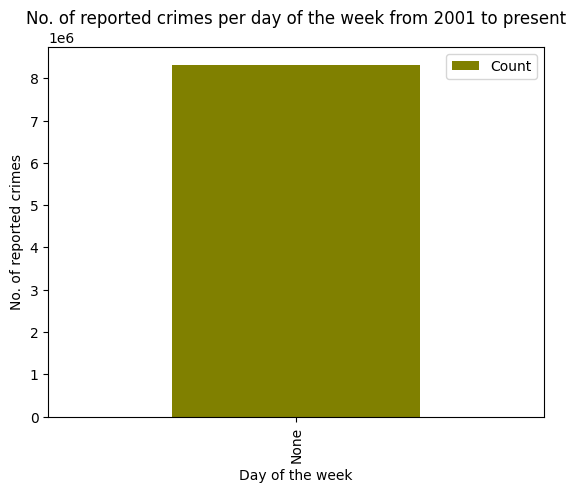

In [58]:
cp.sort_values('Count',ascending=False).plot(kind='bar',color='olive',x='Day_of_week',y='Count')
plt.xlabel('Day of the week')
plt.ylabel('No. of reported crimes')
plt.title('No. of reported crimes per day of the week from 2001 to present')

## (05-01) RDDs setup

In [63]:
!pip install pyspark
# Import the necessary modules from PySpark
from pyspark.sql import SparkSession
from pyspark import SparkContext

# Create a SparkSession and SparkContext
spark = SparkSession.builder.getOrCreate()
sc = spark.sparkContext

psrdd = sc.textFile('police-station.csv')
psrdd.first()

'DISTRICT,DISTRICT NAME,ADDRESS,CITY,STATE,ZIP,WEBSITE,PHONE,FAX,TTY,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION'

In [64]:
ps_header = psrdd.first()

In [65]:
ps_rest = psrdd.filter(lambda line: line != ps_header)
ps_rest.first()

'Headquarters,Headquarters,3510 S Michigan Ave,Chicago,IL,60653,http://home.chicagopolice.org,,,,1177731.401,1881697.404,41.83070169,-87.62339535,"(41.8307016873, -87.6233953459)"'

**How many police stations are there?**

In [66]:
ps_rest.map(lambda line: line.split(',')).collect()

[['Headquarters',
  'Headquarters',
  '3510 S Michigan Ave',
  'Chicago',
  'IL',
  '60653',
  'http://home.chicagopolice.org',
  '',
  '',
  '',
  '1177731.401',
  '1881697.404',
  '41.83070169',
  '-87.62339535',
  '"(41.8307016873',
  ' -87.6233953459)"'],
 ['18',
  'Near North',
  '1160 N Larrabee St',
  'Chicago',
  'IL',
  '60610',
  'http://home.chicagopolice.org/community/districts/18th-district-near-north/',
  '312-742-5870',
  '312-742-5771',
  '312-742-5773',
  '1172080.029',
  '1908086.527',
  '41.90324165',
  '-87.64335214',
  '"(41.9032416531',
  ' -87.6433521393)"'],
 ['19',
  'Town Hall',
  '850 W Addison St',
  'Chicago',
  'IL',
  '60613',
  'http://home.chicagopolice.org/community/districts/19th-district-town-hall/',
  '312-744-8320',
  '312-744-4481',
  '312-744-8011',
  '1169730.744',
  '1924160.317',
  '41.94740046',
  '-87.65151202',
  '"(41.9474004564',
  ' -87.651512018)"'],
 ['20',
  'Lincoln',
  '5400 N Lincoln Ave',
  'Chicago',
  'IL',
  '60625',
  'http://

In [67]:
ps_rest.map(lambda line: line.split(',')).count()

24

**Display the District ID, District name, Address and Zip for the police station with District ID 7**



In [68]:
ps_rest.filter(lambda line: line.split(',')[0] == '7').map(lambda line: (line.split(',')[0],line.split(',')[1],line.split(',')[2],line.split(',')[5])).collect()

[('7', 'Englewood', '1438 W 63rd St', '60636')]

**Police stations 10 and 11 are geographically close to each other. Display the District ID, District name, address and zip code**

In [69]:
ps_rest.filter(lambda line: line.split(',')[0] in ['10','11']).map(lambda line: (line.split(',')[0],line.split(',')[1],line.split(',')[2],line.split(',')[5])).collect()

[('10', 'Ogden', '3315 W Ogden Ave', '60623'),
 ('11', 'Harrison', '3151 W Harrison St', '60612')]